# Regressão aplicada a dados de saturação de água


## Etapa 1: carregamento de dados e pré-processamento
>  Inicialmente irei usar dois tipos de dados: 
> > * Dados1: é com dados calculados do livro do schon, desses dados, temos os perfis de profundidade (depth),  radioatividade (GR), densidade (RHOB), porosidade neutronica (NPHI), resistividade (RES-DEEP), Vsh (VSH), saturação de água (SW) e porosidade de densidade (DPHI-SS), essas ultimas 3 foram calculadas a partir das anteriores e considerando alguns fatores. Dentre os perfis que utilizaremos, o perfil de SW é calculado diretamente da equação de archi com parametros definidos como *Rw=0,03*, *m=1,96* e *n=2,19*
> > * Dados2: é com os dados experimentais e retirados de um poco em Wyoming. Neste, temos dados de profundidade (DEPTH), porosidade sonica (PHI), resistividade (RES) e saturação de água (SW).


> Começaremos fazendo o treinamento da rede através dos dados1

In [29]:
#Bibliotecas que poderão ser usadas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from welly import Well
import lasio

In [30]:
# Vamos ler o arquivo csv direto com o pandas
dados1 = pd.read_csv('C:/Users/horac/Desktop/masters_project/dados1.csv',sep="\s+|\t+|\s+\t+|\t+\s+", engine='python')
dados1
#dados1=dados1.iloc[21:176,:]
#dados1 = dados1.reset_index(drop = True)

,DEPTH,GR,NPHI,RES-DEEP,SW
0,623.47,40.6,0.051,12.64,0.452596
1,623.62,39.4,0.052,12.73,0.451099
2,623.77,39.6,0.055,12.53,0.454389
3,623.93,41.4,0.058,12.12,0.440224
4,624.08,42.3,0.063,11.85,0.471115
...,...,...,...,...,...
170,649.38,28.6,0.104,0.84,0.959376
171,649.53,26.7,0.102,0.84,1.011385
172,649.68,25.4,0.104,0.84,1.054971
173,649.83,25.2,0.105,0.83,1.168677


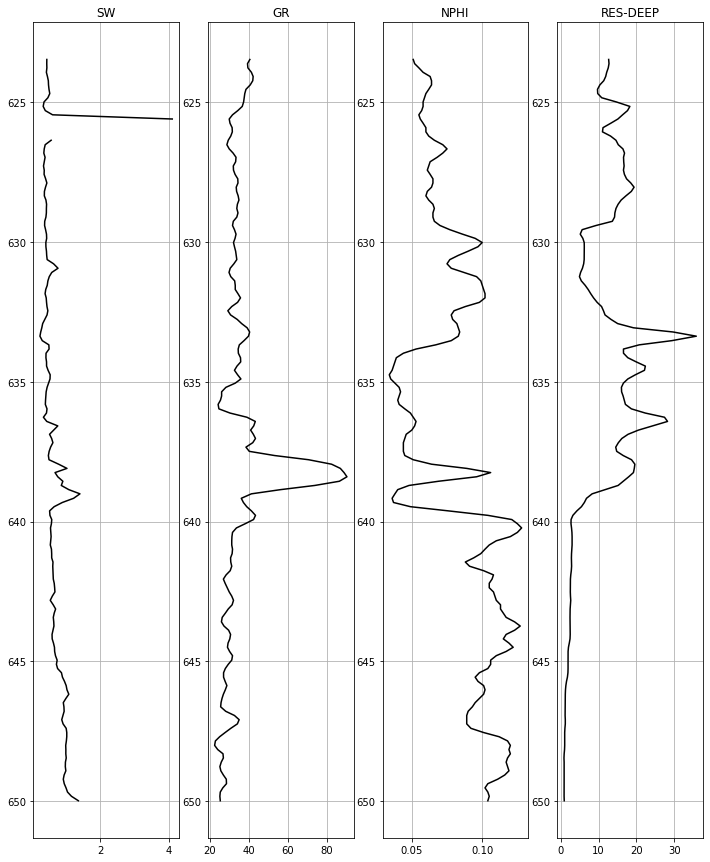

In [31]:
# Plotando para visualizar os perfis
#plt.figure(figsize = (2, 10))
#plt.plot(dados1['SW'],dados1['DEPTH'],color='k')
#ax = plt.gca()


fig, ax = plt.subplots(1,4,figsize=(12,15))
ax[0].plot(dados1['SW'],dados1['DEPTH'],color='k')
#ax[0].set(xlabel = 'RHOB (kg/m³)', ylabel = 'DEPTH (m)')
ax[0].title.set_text('SW')
ax[0].grid()
#ax[0].legend(labels = ['Real','CNN regression', 'BP regression'], loc = "upper right")
#ax[0].set_ylim(well2['Depth'][0], well2['Depth'][len(well2['Depth'])-1])
ax[0].invert_yaxis()

ax[1].plot(dados1['GR'],dados1['DEPTH'],color='k')
#ax[1].set(xlabel = 'RHOB (kg/m³)', ylabel = 'DEPTH (m)')
ax[1].title.set_text('GR')
ax[1].grid()
#ax[1].legend(labels = ['Real','CNN regression', 'BP regression'], loc = "upper right")
#ax[1].set_ylim(well2['Depth'][0], well2['Depth'][len(well2['Depth'])-1])
ax[1].invert_yaxis()

ax[2].plot(dados1['NPHI'],dados1['DEPTH'],color='k')
#ax[2].set(xlabel = 'RHOB (kg/m³)', ylabel = 'DEPTH (m)')
ax[2].title.set_text('NPHI')
ax[2].grid()
#ax[2].legend(labels = ['Real','CNN regression', 'BP regression'], loc = "upper right")
#ax[2].set_ylim(well2['Depth'][0], well2['Depth'][len(well2['Depth'])-1])
ax[2].invert_yaxis()

ax[3].plot(dados1['RES-DEEP'],dados1['DEPTH'],color='k')
#ax[3].set(xlabel = 'RHOB (kg/m³)', ylabel = 'DEPTH (m)')
ax[3].title.set_text('RES-DEEP')
ax[3].grid()
#ax[3].legend(labels = ['Real','CNN regression', 'BP regression'], loc = "upper right")
#ax[3].set_ylim(well2['Depth'][0], well2['Depth'][len(well2['Depth'])-1])
ax[3].invert_yaxis()


In [32]:
# Como temos um problema com os dados ali no começo do perfil de saturação, foi identificado a localização de NaN e vamos retirar esses dados que são prejudiciais
dados1=dados1.iloc[21:176,:]
dados1 = dados1.reset_index(drop = True)

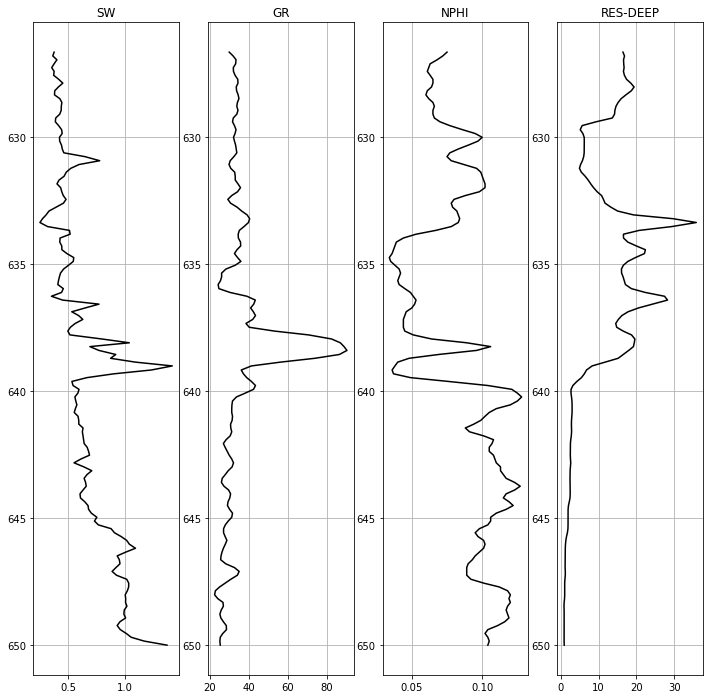

In [33]:
#Plotando para visualizar agora sem os dados corrompidos
fig, ax = plt.subplots(1,4,figsize=(12,12))
ax[0].plot(dados1['SW'],dados1['DEPTH'],color='k')
#ax[0].set(xlabel = 'RHOB (kg/m³)', ylabel = 'DEPTH (m)')
ax[0].title.set_text('SW')
ax[0].grid()
#ax[0].legend(labels = ['Real','CNN regression', 'BP regression'], loc = "upper right")
#ax[0].set_ylim(well2['Depth'][0], well2['Depth'][len(well2['Depth'])-1])
ax[0].invert_yaxis()

ax[1].plot(dados1['GR'],dados1['DEPTH'],color='k')
#ax[1].set(xlabel = 'RHOB (kg/m³)', ylabel = 'DEPTH (m)')
ax[1].title.set_text('GR')
ax[1].grid()
#ax[1].legend(labels = ['Real','CNN regression', 'BP regression'], loc = "upper right")
#ax[1].set_ylim(well2['Depth'][0], well2['Depth'][len(well2['Depth'])-1])
ax[1].invert_yaxis()

ax[2].plot(dados1['NPHI'],dados1['DEPTH'],color='k')
#ax[2].set(xlabel = 'RHOB (kg/m³)', ylabel = 'DEPTH (m)')
ax[2].title.set_text('NPHI')
ax[2].grid()
#ax[2].legend(labels = ['Real','CNN regression', 'BP regression'], loc = "upper right")
#ax[2].set_ylim(well2['Depth'][0], well2['Depth'][len(well2['Depth'])-1])
ax[2].invert_yaxis()

ax[3].plot(dados1['RES-DEEP'],dados1['DEPTH'],color='k')
#ax[3].set(xlabel = 'RHOB (kg/m³)', ylabel = 'DEPTH (m)')
ax[3].title.set_text('RES-DEEP')
ax[3].grid()
#ax[3].legend(labels = ['Real','CNN regression', 'BP regression'], loc = "upper right")
#ax[3].set_ylim(well2['Depth'][0], well2['Depth'][len(well2['Depth'])-1])
ax[3].invert_yaxis()

## Etapa 2: Criando modelo de regressão normal
> * Essa é a primeira tentativa de uso de regressão pelo tensorflow, sem muito processamento dos dados, feito somente para teste inicial.

In [34]:
# Importando tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation

In [35]:
dados1.columns

Index(['DEPTH', 'GR', 'NPHI', 'RES-DEEP', 'SW'], dtype='object')

In [36]:
# Gerando os dados de entrada
x1 = dados1[['NPHI','RES-DEEP']]
y1 = dados1[['SW']]

In [71]:
# Utilizando a função train_test_split (sklearn) para dividir de forma aleatória os elementos dos
# dados 
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state = 42)

In [72]:
# Gerando o modelo
tf.random.set_seed(42)

model1 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(75, activation='relu'),
  tf.keras.layers.Dense(1, activation='linear')                        
])

# Compiling the model
model1.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics = ['mae'])

# Fitting the model
history1 = model1.fit(x1_train, y1_train, epochs = 50)

Epoch 1/50
4/4 [==============================] - 0s 997us/step - loss: 2.1808 - mae: 2.1808
Epoch 2/50
4/4 [==============================] - 0s 656us/step - loss: 1.1876 - mae: 1.1876
Epoch 3/50
4/4 [==============================] - 0s 1ms/step - loss: 0.6556 - mae: 0.6556
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 0.4749 - mae: 0.4749
Epoch 5/50
4/4 [==============================] - 0s 1ms/step - loss: 0.3010 - mae: 0.3010
Epoch 6/50
4/4 [==============================] - 0s 2ms/step - loss: 0.1994 - mae: 0.1994
Epoch 7/50
4/4 [==============================] - 0s 2ms/step - loss: 0.2057 - mae: 0.2057
Epoch 8/50
4/4 [==============================] - 0s 985us/step - loss: 0.1887 - mae: 0.1887
Epoch 9/50
4/4 [==============================] - 0s 2ms/step - loss: 0.1856 - mae: 0.1856
Epoch 10/50
4/4 [==============================] - 0s 998us/step - loss: 0.1577 - mae: 0.1577
Epoch 11/50
4/4 [==============================] - 0s 998us/step - loss: 0.1346 -

In [73]:
from tensorflow.keras.utils import plot_model
plot_model(model1, show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [74]:
# Avaliando o modelo
model1.evaluate(x1_test, y1_test)

1/1 [==============================] - 0s 220ms/step - loss: 0.1004 - mae: 0.1004


[0.10040512681007385, 0.10040512681007385]

Text(0, 0.5, 'Loss')

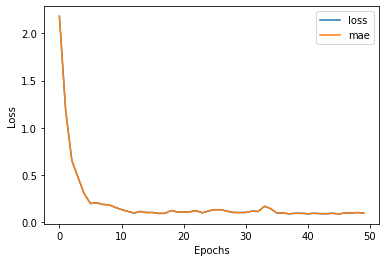

In [75]:
pd.DataFrame(history1.history).plot()
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [76]:
pred = model1.predict(x1)

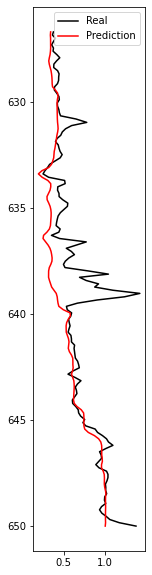

In [77]:
# Figura para comparar o dado real com o calculado
plt.figure(figsize = (2, 10))

plt.plot(dados1['SW'], dados1['DEPTH'], color = 'k')
plt.plot(pred, dados1['DEPTH'], color = 'red')

plt.legend(labels = [ 'Real','Prediction'])
#plt.ylim(well1['Depth'][0],well1['Depth'][len(well1['Depth'])-1])
ax = plt.gca()
ax.invert_yaxis()